In [28]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28x28 images of hand written images 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs = 5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2623 - accuracy: 0.9238
Epoch 2/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1086 - accuracy: 0.9663
Epoch 3/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0722 - accuracy: 0.9775
Epoch 4/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0527 - accuracy: 0.9833
Epoch 5/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0402 - accuracy: 0.9871


In [29]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)


10000/10000 [==============================] - 1s 80us/sample - loss: 0.0868 - accuracy: 0.9755
0.0868174561039661 0.9755


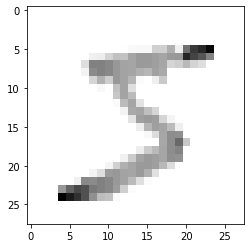

In [23]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

#print(x_train[0])

In [30]:
model.save('epicNumReader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epicNumReader.model\assets


In [39]:
new_model = tf.keras.models.load_model('epicNumReader.model')


In [41]:
predictions = new_model.predict(x_test)


In [42]:
print(predictions)

[[2.9749966e-11 1.5573759e-09 1.4861869e-06 ... 9.9999845e-01
  2.8309510e-09 1.4818610e-09]
 [4.1910638e-14 4.5076781e-06 9.9999547e-01 ... 1.4482120e-12
  4.4190056e-09 9.9420687e-15]
 [1.7135477e-08 9.9995577e-01 2.2569866e-05 ... 3.5316289e-06
  1.1573670e-05 2.6440327e-07]
 ...
 [3.8316742e-11 3.0548819e-08 3.8839926e-10 ... 1.8519009e-06
  3.3297312e-07 1.3001729e-05]
 [9.1106722e-10 1.0552093e-08 1.7957068e-09 ... 1.6109321e-10
  2.6345744e-05 9.1843123e-11]
 [1.9051569e-09 2.3680266e-10 4.8858440e-10 ... 9.4841717e-14
  1.9254867e-09 2.9086459e-11]]


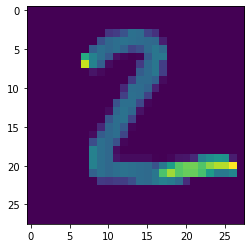

In [45]:
plt.imshow(x_test[1])
plt.show()

In [44]:
import numpy as np
print(np.argmax(predictions[1]))

2
